<a href="https://colab.research.google.com/github/ayobamialimi/DataScienceEcosystem/blob/main/Multivariate_Dummy_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [2]:
# create dummy variables column
dummies = pd.get_dummies(df['Car Model'], dtype=int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [3]:
# concatenate dummies dataframe with the original dataframe
merged = pd.concat([df,dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [4]:
# drop the town column and one dummy variable because of multi-collinear
final = merged.drop(['Car Model','Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [6]:
model = linear_model.LinearRegression()

In [9]:
X = final.drop(['Sell Price($)'] , axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [10]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [11]:
model.fit(X,y)

LinearRegression()

In [13]:
# Predict the price of a mercedex benz that is 4 year old with mileage 45000
model.predict([[45000,4,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [14]:
model.score(X,y)

0.9417050937281082

In [15]:
# Predict the price of a BMW X5 that is 7 year old with mileage 86000
model.predict([[86000,7,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

# **Training and Testing Data**

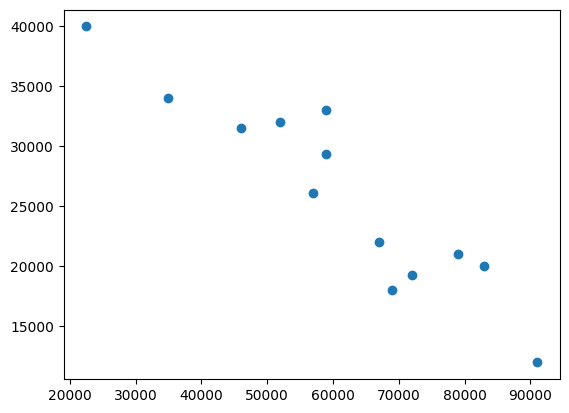

In [24]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

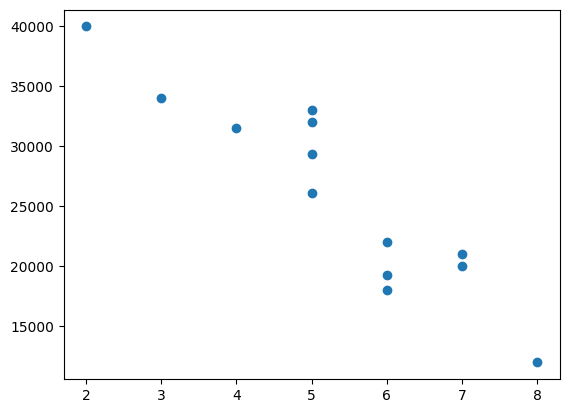

In [25]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [29]:
df2 = df.drop(['Car Model'], axis='columns')
df2

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


In [36]:
X = df2[['Mileage', 'Age(yrs)']]
y = df2['Sell Price($)']

In [37]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [38]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [39]:
# import train_test_split method from Sklearn
from sklearn.model_selection import train_test_split

In [48]:
# supply split data and ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10) # This specify train size to be 80% and test size to be 20%

In [41]:
len(X_train)

10

In [42]:
len(X_test)

3

In [49]:
X_train

,Mileage,Age(yrs)
6,52000,5
8,91000,8
2,57000,5
12,59000,5
5,59000,5
10,83000,7
1,35000,3
0,69000,6
4,46000,4
9,67000,6


In [51]:
clf = linear_model.LinearRegression()

In [53]:
clf.fit(X_train,y_train)

LinearRegression()

In [81]:
X_predict = clf.predict(X_test)
X_predict

array([41842.49106079, 22531.68057211, 18423.93325387])

In [55]:
y_test

3     40000
7     19300
11    21000
Name: Sell Price($), dtype: int64

In [82]:
clf.score(X_test,y_test)

0.9224816911971743